## Let's do some imports first ##

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter
import glob
import pickle
from datetime import datetime
from tqdm import tqdm

In [10]:
import matplotlib as mpl
#some basic text parameters for figures
mpl.rcParams['font.family'] = "Atkinson Hyperlegible" # if installed but not showing up, rebuild mpl cache
mpl.rcParams['font.size'] = 10
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlelocation'] = 'center'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams['figure.titlesize'] = 14
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['pdf.fonttype'] = 42

## Now we want to load the dataset 

What we are interested in here is the SBP and Threshold Crossings Values 

In [11]:
from population_level_analyses import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data_path = "/home/chang/Documents/ND/github/LINK_dataset/data_test"
results = load_all_datasets(data_path, 303)

### LOAD AND PREPROCESS DATA ###
df_tuning = prepare_tuning_data(results)


/home/chang/Documents/ND/github/LINK_dataset/analysis/pop_level_analyses


Processing datasets:   6%|▋         | 19/303 [00:00<00:01, 185.46it/s]

303


Processing datasets: 100%|██████████| 303/303 [00:02<00:00, 127.44it/s]


## Lets look at some dimensionality of our data.

First, we want to calculate how the components needed to explain 80% of the variance (using PCA) changes over time. To do this, we first need to do PCA and calculate the cumulative variance over time.

In [13]:
# pca_results = day_by_day_PCA(df_tuning)

Now,lets plot and see what we get. You'll notice that the components decrease when the data was weird (summer of 2022), but the general trend is a slight increase over time (though there does seem to be more variance as time goes on as well)

Another way of looking at the same data is to break it down into quarters and visualize it on different axes. The same patterns hold here though (as it is the same data). It does seem easier to see here that while over time there is a slight increase in # of components needed for 80%, its not that drastic. 

In [14]:
# explained_var_over_time(df_tuning)

### PCA of Reach Directions

One other cool thing we can do is take a look at our Center Out (CO) tasks, and look at how the dimensionality of the reach directions is changing with time

findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson

2020
2023


findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson

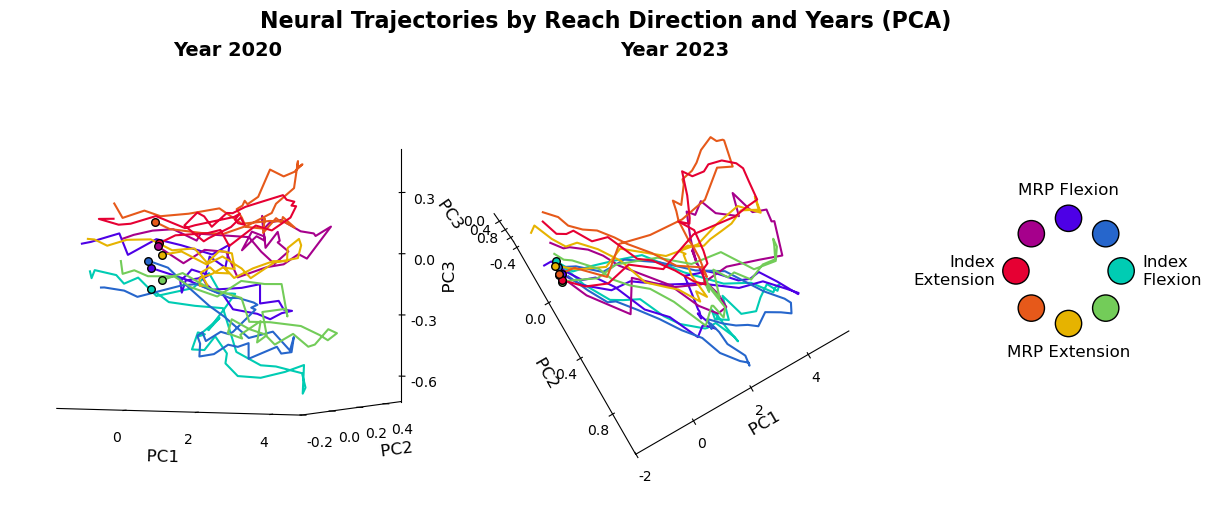

In [15]:
plot_avg_trajectories(df_tuning, type_of_data='sbps', group_by = 'year', trim_method = trim_neural_data_at_movement_onset_std_and_smooth, trim_pt = max_jerk, sigma = .5, years_to_skip=[2021, 2022], directions='ext_flex', remove_RT=False)


Made trial classes
(7484726, 96)
Grouped Data


/home/chang/Documents/ND/github/LINK_dataset/analysis/pop_level_analyses/population_level_analyses.py:998: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.1, right=1.1, top=0.9, bottom=0.1)
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
findfont: Font family 'Atkinson Hyperlegible' not found.
fi

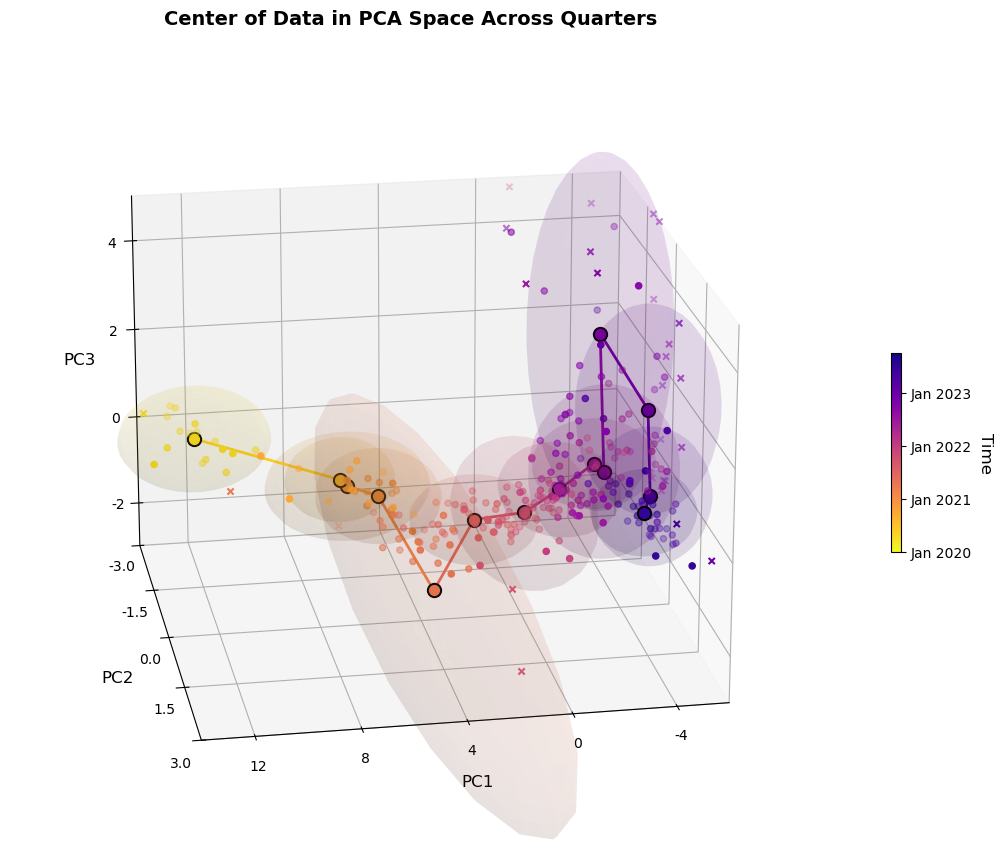

In [16]:
plot_centroid_of_pca_data_across_time(df_tuning, group_by='quarter', remove_RT=False, normalization_method = 'all', years_to_skip = [], plot_centr_across_time=True)
